# Titanic - Making sense of the data

Importing all the packages which are used later in the code. Increases RAM usage but at least the code remains clean.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

tqdm.pandas()

Loading data files to be used in the code.

In [2]:
train_data = pd.read_csv('train.csv')

Let's see how data looks.

In [3]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Now let's see the labels and data types of all columns as describe() method didn't tell about all columns.

In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We don't need to focus on passenger names and their ticket number. It would not be putting any significant contribution to our model. Also, PassengerId is anyways need not to be taken into consideration.

In [5]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

Printing top 5 entries to see how data looks like.

In [6]:
print(train_data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S


From the above 5 entries, it can be interpreted we don't have much knowledge about Cabin for passengers. From the above set, it can be assumed that it only contains information of about 50% passengers. Would be safe to remove the column, but still wait for further analysis.

Let's check which columns contain missing data.

In [7]:
nan_list = train_data.columns[train_data.isna().any()].tolist() #The list of column labels that contain missing values.
print(nan_list)

['Age', 'Cabin', 'Embarked']


3 columns contain missing data. Let's handle these 3 columns first. If missing data for any column is less than 1%, we remove the entry. If between 1-20%, we can average it according to other entries, else we would remove the column.
As data of majority passengers would be missing, it won't give significant level of improvement to the model so it is fair to remove it.

As each column contains different type of data, different way would be needed to handle each column's missing value. Checking frequency, though is independent of it.

In [8]:
def freq_missing_data(dataframe, column_list):
    '''This method prints the frequency of missing data in the columns with labels as in the column_list parameter in the
    dataframe.
    891 is not a magic number. It is the count of passengers on board which was found earlier when executed
    pandas.describe()'''
    for column in tqdm(column_list):
        count = dataframe[column].isnull().sum()
        freq = count / 891
        print("Frequency of missing values in {} is {:.2%}".format(column, freq))
        
freq_missing_data(train_data, nan_list)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Frequency of missing values in Age is 19.87%
Frequency of missing values in Cabin is 77.10%
Frequency of missing values in Embarked is 0.22%


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 752.25it/s]


Ouch! 77.1% missing data in Cabin column. Just drop it.

In [9]:
train_data.drop('Cabin', axis = 1, inplace = True)

Next, delete entry with missing values in Embarked. 0.22% means 2 entries have missing data here.

In [10]:
train_data.dropna(subset = ['Embarked'], inplace = True)

Done. Next, we would handle Age column. Where there is a missing value, we would add average of that column there. This could have been done for Embarked column but I prefer removing entries when frequency of missing data is this low.

In [11]:
train_data.fillna(train_data.mean(), inplace = True)

Done. Let's verify for confirmation.

In [12]:
print(train_data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.642093    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.968346    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   29.642093    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Now, our data is prepared to be analyzed in a better perspective with the magic of matplotlib.

Let us first see, were rich people privileged or middle class guys were lucky. #Assumption: Fare>Average means rich. Fare<=Average means middle class.

100%|████████████████████████████████████████████████████████████████████████████████████████| 889/889 [00:00<?, ?it/s]


[121, 219]


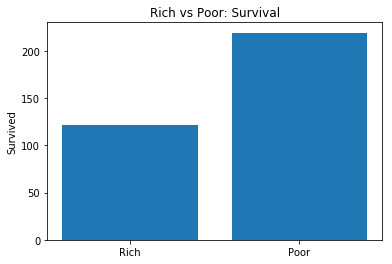

In [13]:
def get_survive_as_fare(dataframe):
    '''This method returns a list of the frequency of the people who survived the disaster. First element in the list
    is the frequency of the rich people who survived while the second element is the frequence of the poor people who survived.
    DEFINITION: Rich --> Passengers who bought tickets for more than ceil of mean of fare.
    DEFINITION: Poor --> Passengers who bought tickets for less than or equal to ceil of mean of fare.
    33 used ahead came from [32.096681] where [.] is the greatest integer function where 32.096681 is the mean fare found
    in the previous step using pandas.describe()'''
    survived_list = dataframe['Survived'].tolist()
    fare_list = dataframe['Fare'].tolist()
    count = []
    count_rich_survived = 0
    count_poor_survived = 0
    for i in tqdm(range(0, 889)):
        passenger = survived_list[i]
        fare = fare_list[i]
        if passenger == 1:
            if fare > 33:
                count_rich_survived += 1
            else:
                count_poor_survived += 1
    count.append(count_rich_survived)
    count.append(count_poor_survived)
    return count
    

count = get_survive_as_fare(train_data)
print(count)
plt.bar([1,2], count)
plt.xticks([1,2], ('Rich', 'Poor'))
plt.ylabel('Survived')
plt.title('Rich vs Poor: Survival')
plt.show()

It isn't the output I expected. 121 people who bought ticket for higher rate survived while 219who survived, bought tickets at a lesser rate.

But this isn't true perspective. Re writing the above function to return the percentage of the people that survived from both categories would be more beneficial.

100%|████████████████████████████████████████████████████████████████████████████| 889/889 [00:00<00:00, 892042.17it/s]


[59.31372549019608, 31.97080291970803]


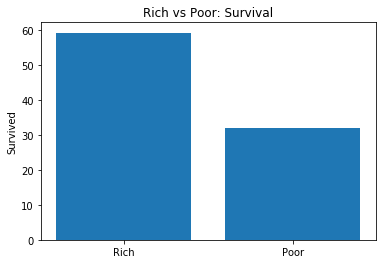

In [14]:
def get_survive_as_fare(dataframe):
    '''This method returns a list of the percentage of the people who survived the disaster. First element in the list
    is the percentage of the rich people who survived while the second element is the percentage of the poor people who survived.
    DEFINITION: Rich --> Passengers who bought tickets for more than ceil of mean of fare.
    DEFINITION: Poor --> Passengers who bought tickets for less than or equal to ceil of mean of fare.
    33 used ahead came from [32.096681] where [.] is the greatest integer function where 32.096681 is the mean fare found
    in the previous step using pandas.describe()'''
    survived_list = dataframe['Survived'].tolist()
    fare_list = dataframe['Fare'].tolist()
    percent = []
    count_rich_survived = 0
    count_rich = 0
    count_poor_survived = 0
    count_poor = 0
    for i in tqdm(range(0, 889)):
        passenger = survived_list[i]
        fare = fare_list[i]
        if passenger == 1:
            if fare > 33:
                count_rich_survived += 1
                count_rich += 1
            else:
                count_poor_survived += 1
                count_poor +=1
        else:
            if fare > 33:
                count_rich += 1
            else:
                count_poor +=1
    percent.append(count_rich_survived / count_rich * 100.0)
    percent.append(count_poor_survived / count_poor * 100.0)
    return percent
    

percent = get_survive_as_fare(train_data)
print(percent)
plt.bar([1,2], percent)
plt.xticks([1,2], ('Rich', 'Poor'))
plt.ylabel('Survived')
plt.title('Rich vs Poor: Survival')
plt.show()

Now it does looks like what one usually sees. Money speaks. 59.3% of rich people survived compared to 31.97% of poor people.

Let's see how age played the role here. First, plot a graph that shows what percentage of people belonging to each age group survived the tragedy.

100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


[59.375, 38.26086956521739, 33.415233415233416, 44.15584415584416, 38.372093023255815, 40.476190476190474, 18.75, 20.0]


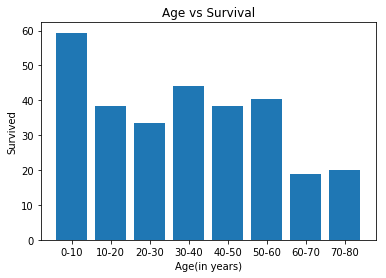

In [15]:
def get_survive_as_age(dataframe):
    '''This method returns a list. The list is of size 8. Each entry of the list is the frequency of people that survived
    that accident from a particular age group. First created a Numpy array and worked with arrays as we usually do. And
    converted it to a list while returning for easy parsing during plot.
    First element of the array is the count of people survived belonging to age group 0-10. Second element of the array
    is the count of people survived belonging to age group 10-20 and so on.
    Range of the loop is 0-889 as total number of passengers in the list is 889'''
    age_list = dataframe['Age'].tolist()
    survive_list = dataframe['Survived'].tolist()
    age_survive = np.zeros((8,), dtype = int)
    for i in tqdm(range(0, 889)):
        age = age_list[i]
        survive = survive_list[i]
        if survive == 1:
            i = int(age/10)
            if age%10 == 0:
                i -= 1
            age_survive[i] = age_survive[i] + 1
    return list(age_survive)


def get_age_list(dataframe):
    '''Here we are making a list of the count of people of all age groups irrespective of the fact that they survived or not.
    Age groups are: 0-10, 10-20, 20-30, ..., 70-80.
    Methodology: Numpy array; worked with arrays; converted to list and returned.'''
    age_group = np.zeros((8,), dtype = int)
    age = dataframe['Age'].tolist()
    for x in tqdm(age):
        y = int(x/10)
        if x%10 == 0:
            y -= 1
        age_group[y] += 1
    return list(age_group)


'''survive_list is the percentage of people that survived the accident from each age group.'''
age_survive_list = get_survive_as_age(train_data)
total_age_list = get_age_list(train_data)
survive_list = []
for x in tqdm(range(0, 8)):
    survive_list.append(age_survive_list[x]/total_age_list[x]*100.0)
print(survive_list)
plt.bar(np.arange(1,9).tolist(), survive_list)
plt.xticks(np.arange(1,9).tolist(), ('0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'))
plt.xlabel('Age(in years)')
plt.ylabel('Survived')
plt.title('Age vs Survival')
plt.show()

59.4% children below age 10 survived the disaster. And only 20% people greater than 70 years in age made it alive back home.

Let's check how many people of each age group were saved.

[38, 44, 136, 68, 33, 17, 3, 1]


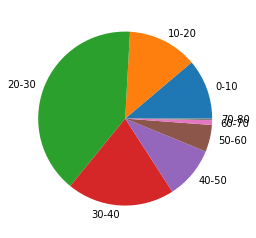

In [16]:
plt.pie(age_survive_list, labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
print(age_survive_list)
plt.show()

70-80 years age group is tough to see. Only 1 out of 5 survived.

How much role did gender play in the survival of people here? Let's find out that too.

100%|████████████████████████████████████████████████████████████████████████████| 889/889 [00:00<00:00, 890125.63it/s]
C:\Users\japke\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


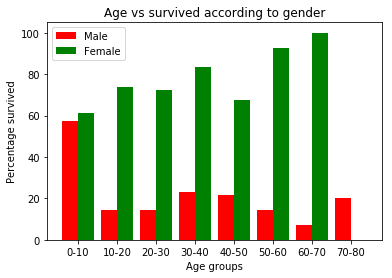

In [17]:
def get_survive_as_gender(dataframe):
    '''In this segment of code, I have tried to find a pattern between age and gender for the possibility of surviving the
    accident. There are 4 numpy arrays, each doing the work the name of the variable says. Later, I have divided corresponding
    elements of the array to find out the percentage of people surviving from each gender for each age group.
    Ignore the warning which occurs while returning the array. It is handled later in the code before making a plot.
    Range is 0-889 as there is a total of 889 passengers list.'''
    gender_list = dataframe['Sex'].tolist()
    survive_list = dataframe['Survived'].tolist()
    age_list = dataframe['Age'].tolist()
    age_male_count = np.zeros((8,), dtype = int)
    age_female_count = np.zeros((8,), dtype = int)
    age_male_survive = np.zeros((8,), dtype = int)
    age_female_survive = np.zeros((8,), dtype = int)
    for x in tqdm(range(0, 889)):
        age = age_list[x]
        gender = gender_list[x]
        survive = survive_list[x]
        x = int(age/10)
        if age%10 == 0:
            x -= 1
        if gender == 'male':
            age_male_count[x] += 1
            if survive == 1:
                age_male_survive[x] += 1
        else:
            age_female_count[x] += 1
            if survive == 1:
                age_female_survive[x] += 1
    return np.divide(age_male_survive, age_male_count), np.divide(age_female_survive, age_female_count)


percent_male, percent_female = get_survive_as_gender(train_data)
percent_male *= 100.0
percent_female *= 100.0
index_nan = np.isnan(percent_female)
percent_female[index_nan] = 0
plt.bar(np.arange(1,9).tolist(), percent_male, color = 'r', width = 0.4, label = 'Male')
plt.bar((np.arange(1,9)+0.4).tolist(), percent_female, color = 'g', width = 0.4, label = 'Female')
plt.xlabel('Age groups')
plt.xticks((np.arange(1,9)+0.2).tolist(), ('0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'))
plt.ylabel('Percentage survived')
plt.title('Age vs survived according to gender')
plt.legend()
plt.show()

Females survived this tragedy by a lot big margin. Almost 5 ladies survived for each 1 man who lived to see another day.

Let us now see, how does the starting point of everyone's journey impacted their chances of surviving the accident. We now look into two ways of exploring data here. We check the percentage of people from each location that survive the accident. We also check the contribution of each station to the survival's list.

100%|████████████████████████████████████████████████████████████████████████████| 889/889 [00:00<00:00, 438520.08it/s]
C:\Users\japke\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


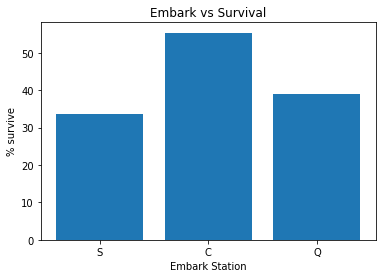

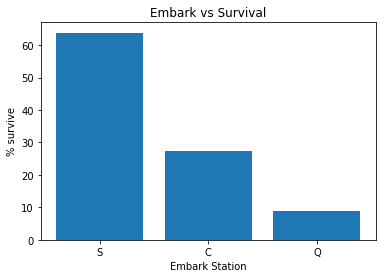

In [18]:
def get_survive_as_embarked(dataframe):
    '''
    This method does 2 things. It first finds and returns the % of people who started from a particular 
    station that survived the accident. It also find the % of people who survived the incident per each
    boarding station.
    '''
    embark_list = dataframe['Embarked'].tolist()
    survived_list = dataframe['Survived'].tolist()
    started_from = np.zeros((3,), dtype = int)
    survive_started = np.zeros((3,), dtype = int)
    station = {'S': 0, 'C': 1, 'Q': 2}
    for x in tqdm(range(0, 889)):
        embark = embark_list[x]
        survive = survived_list[x]
        started_from[station[embark]] += 1
        if survive == 1:
            survive_started[station[embark]] += 1
    return np.divide(survive_started, started_from), np.divide(survive_started, np.sum(survive_started))

# Defining variables:
# x --> the percentage of people from each station that survived the accident.
# y --> the percentage of people that survived the incident from each station.
x, y = get_survive_as_embarked(train_data)
x *= 100.0
y *= 100.0
f = plt.figure(1)
plt.bar(np.arange(1,4).tolist(), list(x))
plt.title("Embark vs Survival")
plt.xlabel("Embark Station")
plt.ylabel("% survive")
plt.xticks(np.arange(1,4).tolist(), ('S', 'C', 'Q'))
f.show()

g = plt.figure(2)
plt.bar(np.arange(1,4).tolist(), list(y))
plt.title("Embark vs Survival")
plt.xlabel("Embark Station")
plt.ylabel("% survive")
plt.xticks(np.arange(1,4).tolist(), ('S', 'C', 'Q'))
g.show()

More than 50% people who boarded from Cherbourg survived the incident. But overall more than 60% people who made it alive had boarded from Southampton. A detailed analysis is mentioned in conclusions below.

Time to see how family contributed in the survival rate. A family is defined as the sum of siblings, spouses, parents, and children. Here we plot according to the number of family members each passenger had.

100%|████████████████████████████████████████████████████████████████████████████| 889/889 [00:00<00:00, 881081.35it/s]


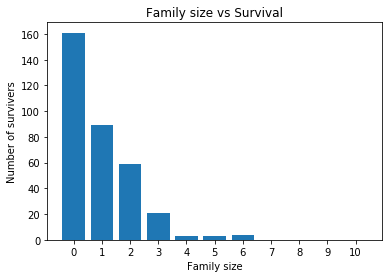

[161  89  59  21   3   3   4   0   0   0   0]


In [19]:
def get_survive_as_family(dataframe):
    '''
    This method returns a numpy array of the sizes of the family of the deceased on board that day.
    '''
    family_size = np.asarray(dataframe['SibSp'].tolist()) + np.asarray(dataframe['Parch'].tolist()).tolist()
    survived_list = dataframe['Survived'].tolist()
    x = max(family_size) # x is just a temporary variable to store family size.
    support_survive = np.zeros((x+1,), dtype = int)
    for i in tqdm(range(0, 889)):
        survive = survived_list[i]
        size = family_size[i]
        if survive == 1:
            support_survive[size] += 1
    return support_survive

support = get_survive_as_family(train_data)
plt.bar(np.arange(1,len(support)+1), support)    
plt.xticks(np.arange(1, len(support)+1), ('0','1','2','3','4','5','6','7','8','9','10','11'))
plt.title("Family size vs Survival")
plt.xlabel("Family size")
plt.ylabel("Number of survivers")
plt.show()
print(support)

That is strange. 161 of the people that survived were lone wolves on the ship.

### Conclusions from analyzing training data

1. If a person has spend more than 33 dollars, chances of his/her survival are almost twice than the person who spend less than 33 dollars.

2. 64% of people who survived were less than 30 years in age. 

3. A child less than 10 years in age has 3 times more chances of survival than a person belonging to age group of 60-70.

4. A girl child and a boy child below age of 10 have the same probability of survival. Whereas, a lady is roughly 5 times more likely than man to survive the accident.

5. A third of the people that boarded from Southampton survived the incident which accounts for 61% of people who survived. 40% people boarding from Queenstown were alive after the accident which accounts for less than 10% people that managed to live that day.

6. 250 people who survived the accident were travelling either alone, or with just 1 family member. A family consists of total number of siblings, spouses, parents and children. This figure accounts for almost 74% of the surviving people.